# Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [69]:
import numpy as np
import pandas as pd

In [152]:
from sklearn import datasets, model_selection, linear_model, metrics, ensemble
from sklearn.ensemble import RandomForestClassifier

In [71]:
housing = datasets.fetch_california_housing()

In [72]:
X, y = pd.DataFrame(housing.data, columns=housing.feature_names), housing.target
X.head(10), y

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
 6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
 7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
 8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
 9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  
 5    -122.25  
 6    -122.25  
 7    -122.25  
 8    -

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


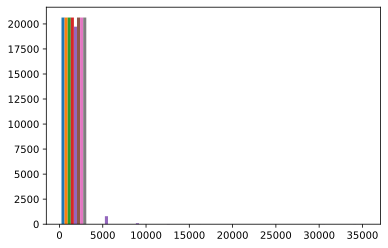

In [74]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']


plt.hist(X)
plt.show()


In [78]:
# чистим выбросы
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [79]:
# Большие выброси на AveRooms, 3 квартиль 6, макс - 141 и по аналогии:
X['target'] = y

In [82]:
# предположим, что в доме не должно быть более 15 комнат, не более 7 чаловек на комнату и количество жителей в доме не более 10 000
X.drop(X[(X['AveRooms'] > 15) | (X['AveOccup'] > 7) | (X['Population'] > 10000)].index, inplace=True)
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000
mean,3.870520,28.720157,5.311473,1.072665,1414.243102,2.911927,35.621893,-119.570968,2.071367
std,1.895791,12.557112,1.316555,0.159552,1026.167537,0.734109,2.132021,2.005013,1.154951
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.563975,18.000000,4.436876,1.005825,792.000000,2.430380,33.930000,-121.800000,1.196750
50%,3.534950,29.000000,5.221658,1.048207,1168.000000,2.818426,34.250000,-118.490000,1.802000
75%,4.746325,37.000000,6.031433,1.098214,1724.250000,3.278557,37.710000,-118.010000,2.653000
max,15.000100,52.000000,14.851852,3.716418,9936.000000,6.954023,41.950000,-114.310000,5.000010


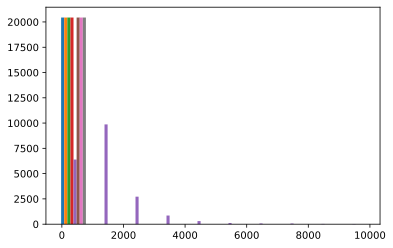

In [92]:
plt.hist(X)
plt.show()

# признак Population также можно уменьшить кратно, но оставим на 10к, тут явно плавное убывание

In [83]:
# снова отделяем таргет
X, y = X.drop('target', axis=1), X['target']

In [84]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
X_train.head(10), X_test.head(10), y_train, y_test

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 15040  3.3906      33.0  5.695550   1.037471      1147.0  2.686183     32.78   
 13340  4.8906      16.0  6.404211   1.103158      1516.0  3.191579     34.02   
 11307  3.0125      40.0  4.271429   0.971429       163.0  2.328571     33.78   
 13791  3.7361       5.0  6.202151   1.219355      1396.0  3.002151     34.41   
 15049  3.4340      17.0  5.352941   1.048559      6990.0  2.759574     32.78   
 5745   3.1733      19.0  3.599260   1.056720      1866.0  2.300863     34.16   
 12876  2.7955      22.0  5.319778   1.107209      1362.0  2.517560     38.66   
 17083  3.1989      37.0  3.943820   0.996255       939.0  3.516854     37.47   
 11444  5.8252       7.0  5.144414   1.066303      2493.0  2.264305     33.67   
 17502  2.8971      37.0  4.077540   0.970588      1075.0  2.874332     37.36   
 
        Longitude  
 15040    -116.95  
 13340    -117.67  
 11307    -117.94  
 13791    -117.51  
 15049 

In [86]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
lr.coef_

array([ 4.18062637e-01,  1.03854971e-02, -8.74126979e-02,  7.24341848e-01,
        3.56114581e-05, -3.65071466e-01, -4.49470863e-01, -4.39572916e-01])

In [88]:
lr.intercept_

-35.69283408706968

In [89]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [90]:
res = lr.predict(X_test)
res

array([2.8433184 , 2.08752919, 0.11527689, ..., 1.40632392, 1.09664029,
       2.55341998])

In [91]:
lr.score(X_test, y_test), lr.score(X_train, y_train)

(0.6790838280845644, 0.6574409635479381)

Отделив явные отклонения удалось повысить % предсказания с 59 до 67

In [94]:
metrics.r2_score(y_test, res)

0.6790838280845644

# Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [101]:
model = ensemble.RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [105]:
y_train_df = pd.DataFrame({'target': y_train})
model.fit(X_train, y_train_df.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [106]:
model

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [107]:
res_rft = model.predict(X_test)

In [108]:
model.score(X_test, y_test)

0.8110138352057994

In [109]:
metrics.r2_score(y_test, res_rft)

0.8110138352057994

Модель RandomForestRegressor явно лучше справляется с предсказанием цены, на 14% вероятность true positive и false negative выше, чем у линейной регрессии

# Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [112]:
help(ensemble.RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimato

In [113]:
model.feature_importances_

array([0.55335282, 0.04881767, 0.0379281 , 0.0235341 , 0.0251445 ,
       0.14069624, 0.08613115, 0.08439543])

In [122]:
affected_columns = pd.DataFrame({'importance_value': model.feature_importances_, 'value_name': X_test.columns})
affected_columns.sort_values('importance_value', ascending=False).reset_index(drop=True, inplace=True)
affected_columns[affected_columns.index < 2], affected_columns['importance_value'].sum()

(   importance_value value_name
 0          0.553353     MedInc
 1          0.048818   HouseAge,
 1.0)

# *Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.

С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. 
Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:

pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.
Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.

У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:

parameters = 
[{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.

Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

In [126]:
df = pd.read_csv('../Визуализация данных в Matplotlib/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


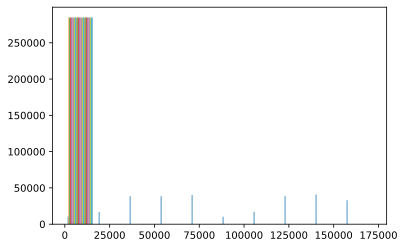

In [129]:
# ensemble.RandomForestClassifier
# model_selection.GridSearchCV
# model_selection.train_test_split

plt.hist(df)
plt.show()

In [130]:
df.value_counts(normalize=True)

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        0.000063
          -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [132]:
pd.options.display.max_columns = 100
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [135]:
# type(df['Class']) 
# точно Series
X, y = df.drop('Class', axis=1), df['Class']

In [137]:
X.head(10), y 

(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
 6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
 7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
 8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
 9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   
 
          V8        V9       V10       V11       V12       V13       V14  \
 0  0.098698  0.3637

In [140]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [146]:
X_train.info(), X_test.info(), y_train.info(), y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 222925 to 271
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20     199364 non-null  float64
 21  V21     

(None, None, None, None)

In [148]:
parameters = {'n_estimators': [10, 15],
               'max_features': np.arange(3, 5),
               'max_depth': np.arange(4, 7)}

In [154]:
# Создайте модель GridSearchCV со следующими аргументами:
# estimator=RandomForestClassifier(random_state=100),
# param_grid=parameters,
# scoring='roc_auc',
# cv=3.

model_gscv = model_selection.GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3)
model_gscv

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': array([4, 5, 6]),
                         'max_features': array([3, 4]),
                         'n_estimators': [10, 15]},
             scoring='roc_auc')

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.

Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

In [155]:
model_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': array([4, 5, 6]),
                         'max_features': array([3, 4]),
                         'n_estimators': [10, 15]},
             scoring='roc_auc')

In [156]:
model_gscv.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [158]:
res_gscv = model_gscv.predict_proba(X_test)

In [170]:
t_res_gscv = model_gscv.predict_proba(X_train)
# t_res_gscv
y_pred_proba_train = t_res_gscv[:, 0]

In [171]:
y_pred_proba = res_gscv[:, 0]

In [173]:
metrics.roc_auc_score(y_test, y_pred_proba), metrics.roc_auc_score(y_train, y_pred_proba_train)

(0.053733584396284444, 0.029647211744524907)